In [1]:
import pandas as pd
import numpy as np
import os
import statsmodels.api as sm
import matplotlib.pyplot as plt

%matplotlib inline



In [2]:
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols

In [3]:
# create the path for the file

myPath = os.path.join('/Users', 'Bryan', 'Documents', 'Programming',
                      'time_series_forecasting_with_python',
                      'UDEMY_TSA_FINAL','Data')

print(myPath)

os.chdir(myPath)

/Users/Bryan/Documents/Programming/time_series_forecasting_with_python/UDEMY_TSA_FINAL/Data


In [4]:
# get non-stationary data set

df1 = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

# monthly data
df1.index.freq = 'MS'

In [5]:
# stationary data

df2 = pd.read_csv('DailyTotalFemaleBirths.csv', index_col='Date', parse_dates=True)

# daily data
df2.index.freq = 'D'

In [6]:
df1.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [7]:
df2.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.DataFrame({'a':[13, 5, 11, 12, 9]})
df

,a
0,13
1,5
2,11
3,12
4,9


In [10]:
acf(df['a'])

array([ 1.   , -0.5  , -0.2  ,  0.275, -0.075])

In [11]:
# yule-walker method
# method can be mle or unbiased

pacf_yw(df['a'], nlags=4, method='unbiased')

array([ 1.        , -0.625     , -1.18803419,  2.03764205,  0.8949589 ])

In [12]:
pacf_ols(df['a'], nlags=4)

array([ 1.        , -0.49677419, -0.43181818,  0.53082621,  0.25434783])

In [13]:
from pandas.plotting import lag_plot

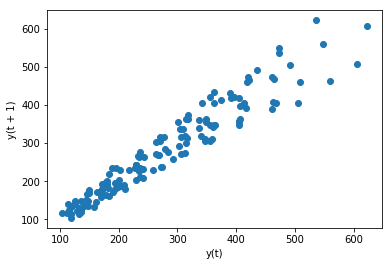

In [14]:
lag_plot(df1['Thousands of Passengers'])

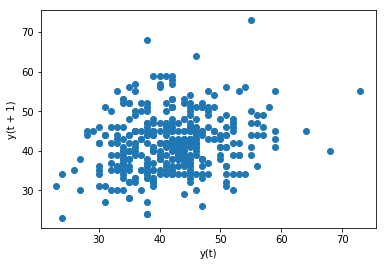

In [15]:
lag_plot(df2['Births'])

In [16]:
from matplotlib.pyplot import figure
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

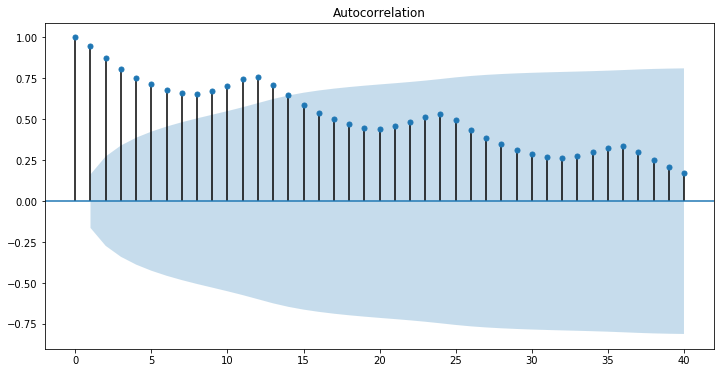

In [17]:
N, M = 12, 6
fig, ax = plt.subplots(figsize=(N, M))
plot_acf(df1['Thousands of Passengers'], lags=40, ax=ax)
plt.show()

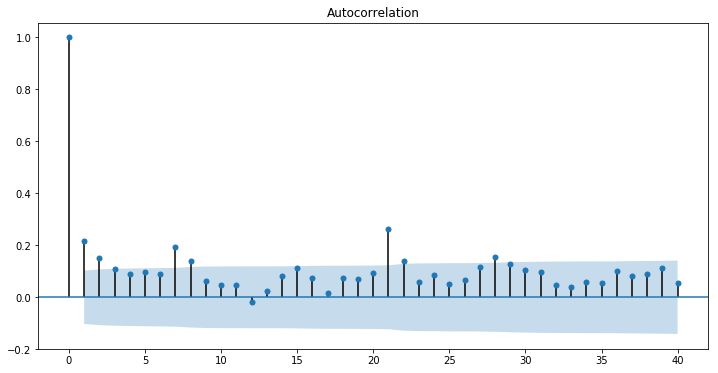

In [18]:
fig, ax = plt.subplots(figsize=(N, M))
plot_acf(df2['Births'], lags=40, ax=ax)
plt.show()

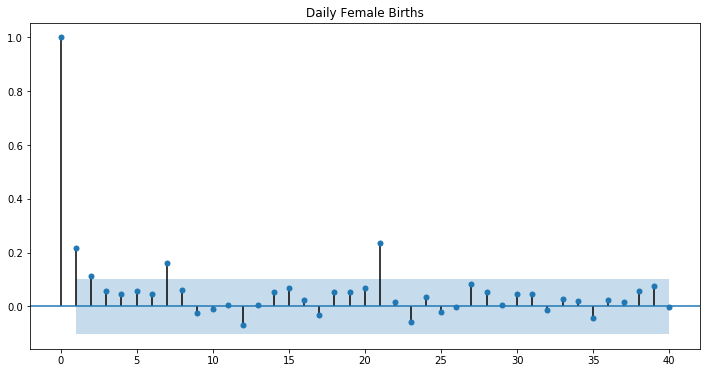

In [19]:
fig, ax = plt.subplots(figsize=(N, M))
plot_pacf(df2, lags = 40, title='Daily Female Births', ax=ax)
plt.show()

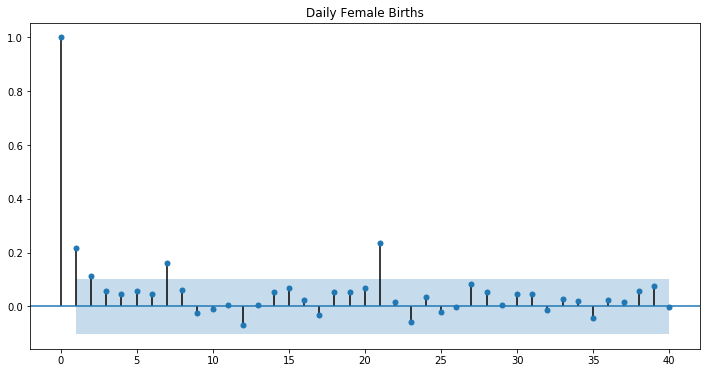

In [20]:
N, M = 12, 6
fig, ax = plt.subplots(figsize=(N, M))
plot_pacf(df2, lags = 40, title='Daily Female Births', ax=ax)
plt.show()

In [23]:
from pandas.tools.plotting import autocorrelation_plot


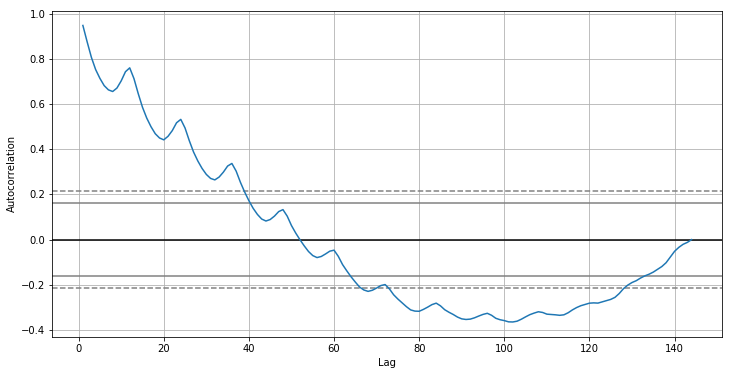

In [25]:
N, M = 12, 6
fig, ax = plt.subplots(figsize=(N, M))
autocorrelation_plot(df1['Thousands of Passengers'], ax=ax)
plt.show()